In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
index = pd.DatetimeIndex(start=data.data['date'][0].decode('utf-8'), periods=len(data.data), freq='W-SAT')
y = pd.DataFrame(data.data['co2'], index=index, columns=['co2'])

In [51]:
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [52]:
y.shape

(2284, 1)

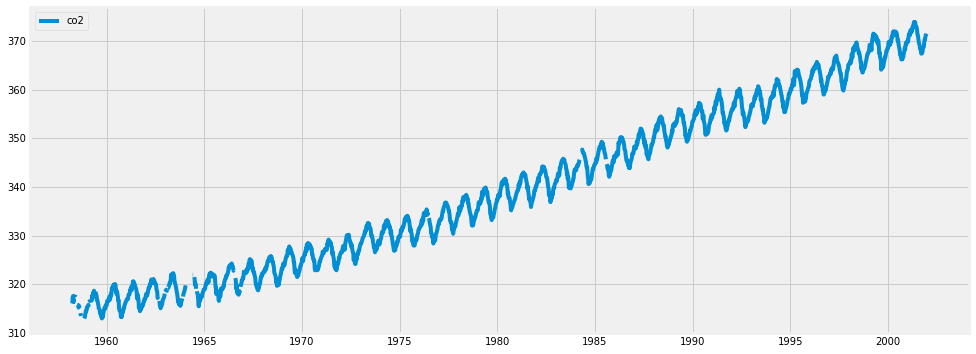

In [53]:
y.plot(figsize=(15, 6))
plt.show()

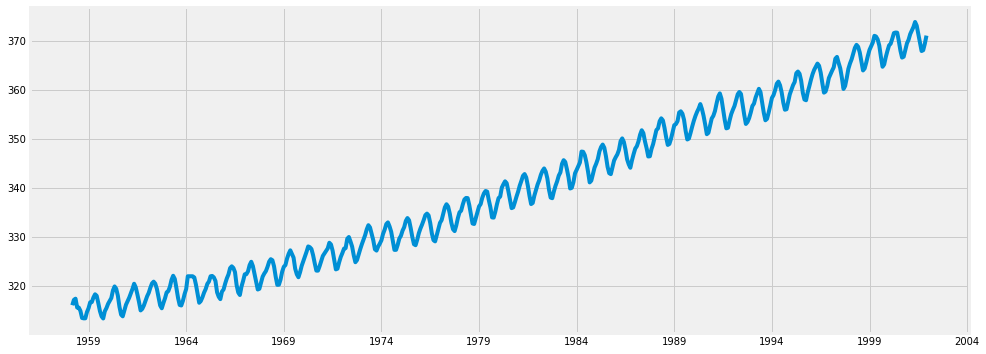

In [54]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

y.plot(figsize=(15, 6))
plt.show()

In [55]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624040383
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727642769
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878510565101
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578977746117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912723444
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754229354
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327593792
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066935976
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716806674
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1085.52473663032
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:830.4362118902802
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893608688
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988074765
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194076
A

In [57]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3183      0.092      3.443      0.001       0.137       0.499
ma.L1         -0.6255      0.077     -8.167      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.808      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.633      0.000       0.089       0.106


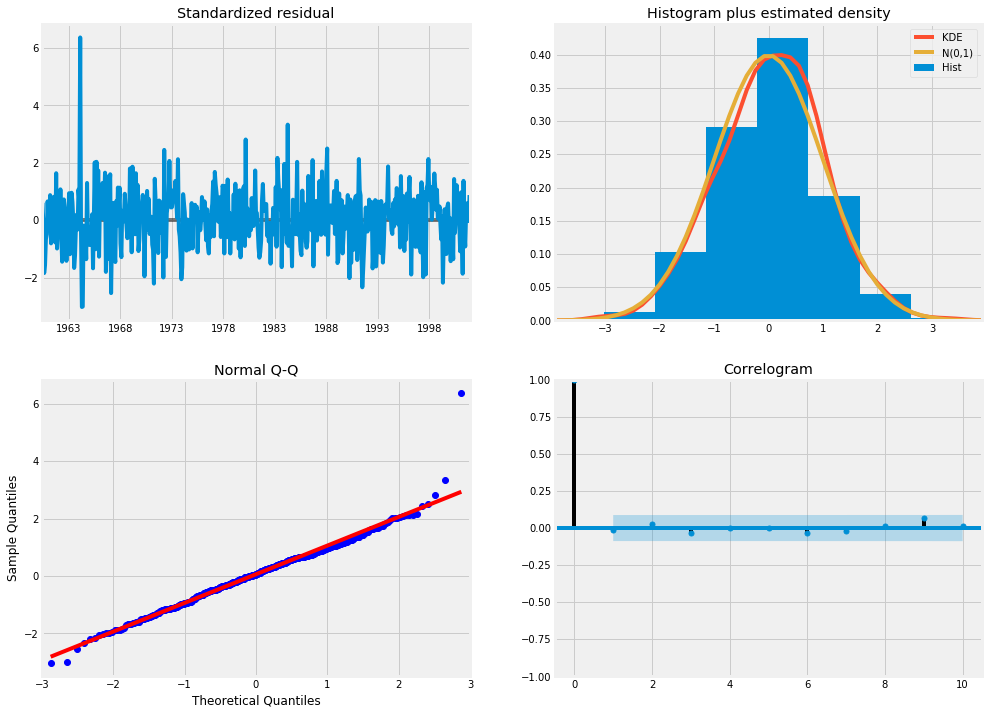

In [59]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()